# Load libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load dataset

In [2]:
dataset=pd.read_csv("C:/Users/ssand/Dataset/creditcard.csv")

In [3]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Dataset information

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Distribution of legit and fraudalent transaction

In [7]:
dataset['Class'].value_counts()  # out of 3lakh data only 492 are fraud so it will always give accuracy of arount 99% from which we can't really know wesather the transaction is fraud so we have to balance this dataset 

0    284315
1       492
Name: Class, dtype: int64

# this dataset is highly unbalance
### 0 --> normal transaction
### 1 --> fraud

In [8]:
# separating data for analysis

In [9]:
legit=dataset[dataset.Class==0]
fraud=dataset[dataset.Class==1]

In [10]:
legit.shape

(284315, 31)

In [11]:
fraud.shape

(492, 31)

In [12]:
#Stratistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
dataset.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


###### watch this video to understand how to handle imbalanced dataset - https://www.youtube.com/watch?v=JnlM4yLFNuo&ab_channel=codebasics

# under sampling

Build a sample dataset containing similar distribution of normal transaction and the fraudalent transaction

Number of fraudalent transaction ---> 492 

In [15]:
legit_sample =legit.sample(n=492)

In [16]:
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131421,79594.0,-0.665068,1.216179,0.620694,-0.698772,-0.013219,-0.644243,0.655452,0.241884,-1.140405,...,-0.273323,-1.032497,0.068122,0.041480,-0.269454,0.571447,-0.321318,-0.075312,29.94,0
253695,156364.0,-5.438482,-4.117567,0.044067,0.436035,2.509733,-2.208975,-2.725479,1.221764,0.213551,...,0.304101,0.213239,-1.692306,0.937999,-0.439846,0.594263,0.894598,-1.115097,9.00,0
175802,122496.0,2.003795,0.010025,-2.045920,0.277323,0.698909,-0.849338,0.610639,-0.310551,-0.296886,...,0.158522,0.418231,0.032724,0.755766,0.231960,0.380190,-0.114118,-0.075275,38.11,0
95769,65459.0,1.248304,-0.403581,-0.876399,-1.052239,1.642108,3.349653,-0.814424,0.866539,0.244826,...,-0.225307,-0.893474,0.087715,1.038235,0.156983,0.799989,-0.066616,0.014356,41.05,0
166320,117998.0,-0.728212,0.817312,0.235365,-0.461140,1.103417,-1.006041,1.496039,-0.567438,-0.287640,...,-0.272271,-0.619148,0.030766,1.067703,-0.495297,0.038470,-0.353120,0.090205,65.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176690,122871.0,1.753344,-0.617070,-0.686832,0.037066,0.116943,1.127477,-0.686257,0.499456,0.891547,...,-0.022173,-0.065974,0.395632,-1.489474,-0.727419,-0.558786,0.060700,-0.048916,54.46,0
189535,128442.0,-0.175254,-0.749857,1.472954,-2.409821,-1.502123,0.766308,-0.566904,0.157360,-1.905462,...,0.044647,0.578848,0.182892,0.699237,-0.984058,-0.322166,0.169192,0.183527,120.50,0
97302,66157.0,-0.526087,0.277418,2.433519,-0.141771,-0.192136,1.546153,-0.452813,0.723540,0.146431,...,0.442063,1.413056,0.035951,-0.578349,-0.598734,0.644310,0.105573,0.026138,21.50,0
6809,8585.0,-1.072704,0.757297,1.054094,0.931197,0.447872,0.313336,0.151679,0.581356,0.600492,...,-0.009532,0.072037,-0.060998,-0.356858,-0.104923,-0.444885,0.008563,0.009167,45.58,0


# concatenating two dataframes

In [17]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)  # axis=0 will add two datasets one by one

In [18]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131421,79594.0,-0.665068,1.216179,0.620694,-0.698772,-0.013219,-0.644243,0.655452,0.241884,-1.140405,...,-0.273323,-1.032497,0.068122,0.041480,-0.269454,0.571447,-0.321318,-0.075312,29.94,0
253695,156364.0,-5.438482,-4.117567,0.044067,0.436035,2.509733,-2.208975,-2.725479,1.221764,0.213551,...,0.304101,0.213239,-1.692306,0.937999,-0.439846,0.594263,0.894598,-1.115097,9.00,0
175802,122496.0,2.003795,0.010025,-2.045920,0.277323,0.698909,-0.849338,0.610639,-0.310551,-0.296886,...,0.158522,0.418231,0.032724,0.755766,0.231960,0.380190,-0.114118,-0.075275,38.11,0
95769,65459.0,1.248304,-0.403581,-0.876399,-1.052239,1.642108,3.349653,-0.814424,0.866539,0.244826,...,-0.225307,-0.893474,0.087715,1.038235,0.156983,0.799989,-0.066616,0.014356,41.05,0
166320,117998.0,-0.728212,0.817312,0.235365,-0.461140,1.103417,-1.006041,1.496039,-0.567438,-0.287640,...,-0.272271,-0.619148,0.030766,1.067703,-0.495297,0.038470,-0.353120,0.090205,65.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [19]:
new_dataset['Class'].value_counts()  # new data set with uniformly distributed datset

0    492
1    492
Name: Class, dtype: int64

In [20]:
new_dataset.groupby('Class').mean() #mean is same this tells us that dataset is almost similar
#mean value is same it means that itis a good dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92327.136179,-0.137846,-0.115435,-0.016492,0.003688,-0.025978,0.039169,-0.049838,-0.083576,-0.144687,...,-0.002382,-0.027252,-0.045165,-0.036960,0.022111,0.013349,0.034334,-0.012198,0.000368,104.884065
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# splitting the data into targets

In [21]:
x= new_dataset.drop(columns='Class',axis=1)

In [22]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
131421,79594.0,-0.665068,1.216179,0.620694,-0.698772,-0.013219,-0.644243,0.655452,0.241884,-1.140405,...,-0.056191,-0.273323,-1.032497,0.068122,0.041480,-0.269454,0.571447,-0.321318,-0.075312,29.94
253695,156364.0,-5.438482,-4.117567,0.044067,0.436035,2.509733,-2.208975,-2.725479,1.221764,0.213551,...,0.142788,0.304101,0.213239,-1.692306,0.937999,-0.439846,0.594263,0.894598,-1.115097,9.00
175802,122496.0,2.003795,0.010025,-2.045920,0.277323,0.698909,-0.849338,0.610639,-0.310551,-0.296886,...,-0.138109,0.158522,0.418231,0.032724,0.755766,0.231960,0.380190,-0.114118,-0.075275,38.11
95769,65459.0,1.248304,-0.403581,-0.876399,-1.052239,1.642108,3.349653,-0.814424,0.866539,0.244826,...,0.138763,-0.225307,-0.893474,0.087715,1.038235,0.156983,0.799989,-0.066616,0.014356,41.05
166320,117998.0,-0.728212,0.817312,0.235365,-0.461140,1.103417,-1.006041,1.496039,-0.567438,-0.287640,...,0.015139,-0.272271,-0.619148,0.030766,1.067703,-0.495297,0.038470,-0.353120,0.090205,65.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
y=new_dataset['Class']

In [24]:
y.shape

(984,)

# split the data into training and testing data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape

(787, 30)

In [27]:
x_test.shape

(197, 30)

In [28]:
y_test.shape

(197,)

In [29]:
# model_standarize

In [30]:
scale=MinMaxScaler()

In [31]:
x_train=scale.fit_transform(x_train)

In [32]:
x_test=scale.transform(x_test)

# model initialize

### using logistic regression

In [33]:
regressor=LogisticRegression()

In [34]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_predict_lr=regressor.predict(x_test)

In [36]:
y_predict_lr.shape

(197,)

In [38]:
accuracy=accuracy_score(y_test,y_predict_lr)

In [39]:
accuracy

0.9137055837563451

### using decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [41]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_predict_dt=dt.predict(x_test)

In [43]:
y_predict_dt.shape

(197,)

In [44]:
accuracy=accuracy_score(y_test,y_predict_dt)

In [45]:
accuracy

0.9187817258883249

### using random forest

In [46]:
randomforest=RandomForestClassifier()

In [47]:
randomforest.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_predict_rf=randomforest.predict(x_test)

In [49]:
accuracy=accuracy_score(y_test,y_predict_rf)

In [50]:
accuracy

0.9238578680203046

### using svm

In [51]:
svm=SVC()

In [52]:
svm.fit(x_train,y_train)

SVC()

In [53]:
y_predict_svm=svm.predict(x_test)

In [54]:
accuracy=accuracy_score(y_test,y_predict_svm)

In [55]:
accuracy

0.9137055837563451

### using deep learning

In [56]:
model=Sequential()
model.add(Dense(12,input_shape=(x_train.shape[1],),activation='sigmoid',kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid' ,kernel_initializer='normal'))          

In [57]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [58]:
model.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5095
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5095
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5388
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5883
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6061
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6696
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6912
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7205
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.8158
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.8310
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9187
Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9187
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.9225
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9187
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.9212
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9187
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9212
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9263
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9212
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9263
Epoch 92/100


In [59]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.8782


[0.24740466475486755, 0.8781725764274597]

In [60]:
y_predict_dl=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [62]:
y_predict_dl.shape

(197, 1)

In [64]:
# y_predict
y_pred=[]
for element in y_predict_dl:
    if element> 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [65]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        91
           1       1.00      0.77      0.87       106

    accuracy                           0.88       197
   macro avg       0.90      0.89      0.88       197
weighted avg       0.90      0.88      0.88       197



In [66]:
y_pred[:10]

[0, 1, 0, 1, 1, 0, 0, 1, 1, 1]

In [67]:
import seaborn as sn
cn=confusion_matrix(y_test,y_pred)

In [68]:
cn

array([[91,  0],
       [24, 82]], dtype=int64)

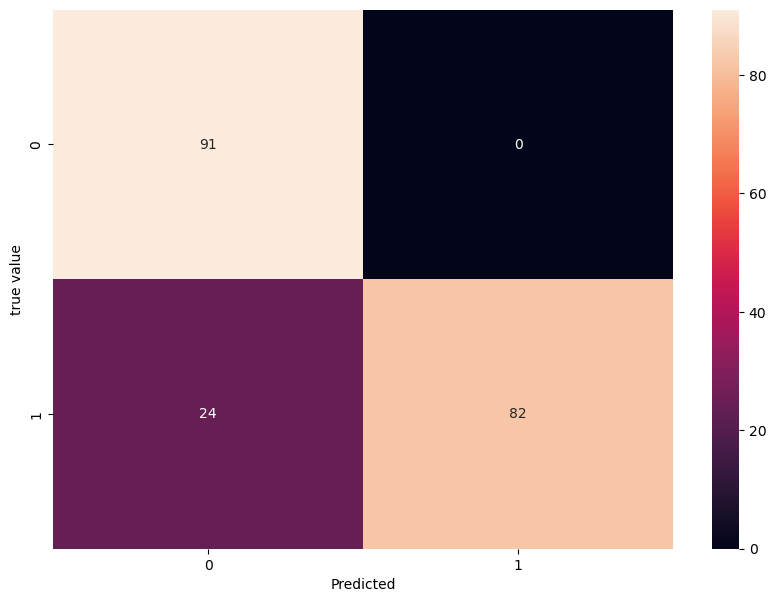

In [69]:
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('true value')
plt.show()